**1. What is a Support Vector Machine (SVM) ?**
 - SVM tries to find the best line (in 2D) or hyperplane (in higher dimensions) that separates data points of different classes with the maximum margin.

That’s why it’s called a “maximum margin classifier.”

**2. What is the difference between Hard Margin and Soft Margin SVM ?**
| **Feature**                      | **Hard Margin SVM**                                                                                    | **Soft Margin SVM**                                                                             |
| -------------------------------- | ------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------------------------------- |
| **Definition**                   | Tries to find a hyperplane that **perfectly separates** all data points without any misclassification. | Allows **some misclassification** to achieve a better balance between margin size and accuracy. |
| **Data Type**                    | Works only when data is **perfectly linearly separable**.                                              | Works even when data is **not perfectly separable** or contains **noise/outliers**.             |
| **Slack Variables (ξ)**          | **Not used** — no violations allowed.                                                                  | **Used** to measure margin violations (how much a point is misclassified).                      |
| **Regularization Parameter (C)** | **Not used.**                                                                                          | **Used** — controls trade-off between maximizing margin and minimizing classification error.    |
| **Flexibility**                  | **Rigid** — doesn’t tolerate any error.                                                                | **Flexible** — tolerates small errors to improve generalization.                                |
| **Effect of Outliers**           | Highly sensitive — a single outlier can break the margin.                                              | Less sensitive — outliers can be handled by tuning **C**.                                       |
| **Margin Type**                  | **Hard (strict)** margin.                                                                              | **Soft (relaxed)** margin.                                                                      |
| **Generalization**               | May **overfit** when noise or outliers exist.                                                          | Usually gives **better generalization** on real-world data.                                     |


**3. What is the mathematical intuition behind SVM ?**
SVM tries to find a hyperplane (a line in 2D, a plane in 3D, etc.) that:

Separates the data into different classes

With the maximum possible margin

The margin = the distance between the hyperplane and the nearest data points from each class (called support vectors).

⚙️ Mathematical Formulation
1️⃣ Equation of the Hyperplane

For binary classification:

𝑤
⋅
𝑥
+
𝑏
=
0
w⋅x+b=0

where:

𝑤
w → weight vector (defines orientation)

𝑏
b → bias (defines position)

𝑥
x → feature vector

2️⃣ Conditions for Perfect Separation

We want:

𝑤
⋅
𝑥
𝑖
+
𝑏
≥
+
1
for
𝑦
𝑖
=
+
1
w⋅x
i
	​

+b≥+1for y
i
	​

=+1
𝑤
⋅
𝑥
𝑖
+
𝑏
≤
−
1
for
𝑦
𝑖
=
−
1
w⋅x
i
	​

+b≤−1for y
i
	​

=−1

Combine both:

𝑦
𝑖
(
𝑤
⋅
𝑥
𝑖
+
𝑏
)
≥
1
∀
𝑖
y
i
	​

(w⋅x
i
	​

+b)≥1∀i
3️⃣ Margin Definition

The distance from any point
𝑥
x to the hyperplane is:

Distance
=
∣
𝑤
⋅
𝑥
+
𝑏
∣
∣
∣
𝑤
∣
∣
Distance=
∣∣w∣∣
∣w⋅x+b∣
	​


For support vectors, this distance is exactly = 1 / ||w||.

So, the margin width = 2 / ||w||

4️⃣ Optimization Objective

To maximize the margin,
we must minimize
∣
∣
𝑤
∣
∣
∣∣w∣∣ (or
1
2
∣
∣
𝑤
∣
∣
2
2
1
	​

∣∣w∣∣
2
 for convenience).

Minimize
1
2
∣
∣
𝑤
∣
∣
2
Minimize
2
1
	​

∣∣w∣∣
2

subject to:

𝑦
𝑖
(
𝑤
⋅
𝑥
𝑖
+
𝑏
)
≥
1
y
i
	​

(w⋅x
i
	​

+b)≥1

This is a convex optimization problem → guarantees a unique global minimum.

5️⃣ For Soft Margin (with Slack Variables ξ)

If perfect separation isn’t possible (real-world data),
we introduce slack variables (ξi) to allow misclassification:

Minimize
1
2
∣
∣
𝑤
∣
∣
2
+
𝐶
∑
𝑖
=
1
𝑛
𝜉
𝑖
Minimize
2
1
	​

∣∣w∣∣
2
+C
i=1
∑
n
	​

ξ
i
	​


subject to:

𝑦
𝑖
(
𝑤
⋅
𝑥
𝑖
+
𝑏
)
≥
1
−
𝜉
𝑖
,
𝜉
𝑖
≥
0
y
i
	​

(w⋅x
i
	​

+b)≥1−ξ
i
	​

,ξ
i
	​

≥0

Here:

𝐶
C = penalty parameter controlling trade-off
between margin size and misclassification tolerance.

6️⃣ Dual Form (for Kernel Trick)

To handle non-linear data, SVM is often expressed in dual form:

Maximize
∑
𝑖
𝛼
𝑖
−
1
2
∑
𝑖
∑
𝑗
𝛼
𝑖
𝛼
𝑗
𝑦
𝑖
𝑦
𝑗
(
𝑥
𝑖
⋅
𝑥
𝑗
)


subject to:

∑
𝑖
𝛼
𝑖
𝑦
𝑖
=
0
,
0
≤
𝛼
𝑖
≤
𝐶
i
∑
	​

α
i
	​

y
i
	​

=0,0≤α
i
	​

≤C

Here,
𝛼
𝑖
α
i
	​

 are Lagrange multipliers, and the dot product
(
𝑥
𝑖
⋅
𝑥
𝑗
)
(x
i
	​

⋅x
j
	​

) can be replaced with a kernel function for non-linear separation.


4.  **What is the role of Lagrange Multipliers in SVM**

- ##  Role of Lagrange Multipliers in SVM

In Support Vector Machines (SVM), we want to **maximize the margin** between classes while satisfying the classification constraints.

The optimization problem for a **Hard Margin SVM** is:

\[
\text{Minimize } \frac{1}{2} ||w||^2
\]
subject to:
\[
y_i (w \cdot x_i + b) \geq 1
\]

However, this is a **constrained optimization problem** — which means we can’t directly minimize it.  
To solve it efficiently, we use the **Lagrange Multipliers method**.

---

### 🔹 Step 1: Form the Lagrangian Function

We introduce one **Lagrange Multiplier (αᵢ)** for each constraint:

\[
L(w, b, \alpha) = \frac{1}{2} ||w||^2 - \sum_{i=1}^{n} \alpha_i [y_i (w \cdot x_i + b) - 1]
\]

Here:
- \( \alpha_i \geq 0 \)
- \( \alpha_i \) represents how important each training point is in defining the decision boundary.

---

### 🔹 Step 2: Apply the Karush-Kuhn-Tucker (KKT) Conditions

We take partial derivatives of **L(w, b, α)** with respect to **w** and **b**, and set them to zero.

\[
\frac{\partial L}{\partial w} = 0 \Rightarrow w = \sum_i \alpha_i y_i x_i
\]
\[
\frac{\partial L}{\partial b} = 0 \Rightarrow \sum_i \alpha_i y_i = 0
\]

By substituting these values back, we get the **Dual Form** of SVM.

---

### 🔹 Step 3: Dual Optimization Problem

\[
\text{Maximize: } W(\alpha) = \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)
\]
subject to:
\[
\alpha_i \geq 0, \quad \sum_i \alpha_i y_i = 0
\]

This **dual form** is easier to solve computationally and allows the **kernel trick** for non-linear data.

---

### 🔹 Step 4: Role of Lagrange Multipliers (αᵢ)

| **Aspect** | **Role of Lagrange Multiplier (αᵢ)** |
|-------------|-------------------------------------|
| **Meaning** | Determines the contribution of each data point to the final decision boundary. |
| **Value = 0** | Point lies **outside the margin** — not a support vector. |
| **Value > 0** | Point lies **on the margin or violates it** — becomes a **support vector**. |
| **Interpretation** | Only data points with non-zero αᵢ affect the model → these are the **support vectors**. |





**What are Support Vectors in SVM?**

- ## Support Vectors in SVM

Support Vectors are the **data points closest to the separating hyperplane**.  
They are the **most important samples** because they **define the margin and decision boundary** in an SVM.

###  Key Points:
- Have **non-zero Lagrange multipliers (αᵢ > 0)**  
- **Lie on or within the margin boundaries**  
- **Decide the optimal hyperplane position**  
- **Points far away** don’t affect the model  

### 🔹 In short:
Support Vectors are the **critical data points** that keep the margin balanced and make SVM work.


**5. What is a Support Vector Classifier (SVC) ?**
- Support Vector Classifier (SVC)

A **Support Vector Classifier (SVC)** is the practical implementation of the **Support Vector Machine (SVM)** algorithm for **classification tasks**.

It finds the **optimal hyperplane** that separates data points of different classes with the **maximum margin**.



**6.What is a Support Vector Regressor (SVR)**
- A **Support Vector Regressor (SVR)** is the regression version of the **Support Vector Machine (SVM)**.  
Instead of classifying data, it predicts a **continuous value** by fitting the best possible line (or hyperplane) within a **tolerance margin**.

**7. What is a Support Vector Regressor (SVR)?**
- A **Support Vector Regressor (SVR)** is a type of **Support Vector Machine (SVM)** used for **regression tasks**.  
It tries to find a **function** that fits the data points within a **tolerance margin (ε)** while keeping the model as flat as possible.

**8.What is the Kernel Trick in SVM?**
- The **Kernel Trick** is a technique in SVM that allows it to handle **non-linearly separable data** by mapping it into a **higher-dimensional space** where it becomes **linearly separable** — without actually computing the transformation.


**9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel:**
- # Comparison of Linear, Polynomial, and RBF Kernels in SVM

| **Feature** | **Linear Kernel** | **Polynomial Kernel** | **RBF (Radial Basis Function) Kernel** |
|--------------|-------------------|------------------------|----------------------------------------|
| **Equation** | \( K(x, x') = x \cdot x' \) | \( K(x, x') = (x \cdot x' + c)^d \) | \( K(x, x') = e^{-\gamma ||x - x'||^2} \) |
| **Nature** | Linear | Non-linear | Non-linear |
| **Use Case** | When data is **linearly separable** | When data has **moderate non-linearity** | When data is **highly non-linear** |
| **Parameters** | None | Degree (d), Constant (c) | Gamma (γ) |
| **Computation** | Fast and simple | Moderately complex | Most complex |
| **Interpretability** | Easy to interpret | Harder as degree increases | Difficult to interpret |
| **Overfitting Risk** | Low | Medium | High (if γ not tuned properly) |
| **Common Usage** | Text classification, linear data | Image and pattern recognition | Most common default kernel in SVM |




**10.What is the effect of the C parameter in SVM?**

- # Effect of the C Parameter in SVM

The **C parameter** in SVM is a **regularization parameter** that controls the **trade-off between maximizing the margin and minimizing classification errors**.

###Key Points:
- **Small C:**  
  - Allows a **wider margin**.  
  - Tolerates more misclassifications.  
  - Leads to a **simpler, more generalized model** (less overfitting).  

- **Large C:**  
  - Forces the model to **classify all points correctly**.  
  - Creates a **narrower margin**.  
  - May lead to **overfitting** on noisy data.

**11. What is the role of the Gamma parameter in RBF Kernel SVM**
- # Role of the Gamma Parameter in RBF Kernel SVM

The **Gamma (γ)** parameter in the **RBF Kernel** controls **how far the influence of a single training example reaches**.

### Key Points:
- **Low Gamma (γ):**  
  - Each data point has a **large influence area**.  
  - The decision boundary becomes **smoother**.  
  - May lead to **underfitting**.

- **High Gamma (γ):**  
  - Each point affects only its **close neighbors**.  
  - The decision boundary becomes **more complex**.  
  - May lead to **overfitting**.


**12. What is the Naïve Bayes classifier, and why is it called "Naïve"**
#Naïve Bayes Classifier

The **Naïve Bayes Classifier** is a **supervised machine learning algorithm** based on **Bayes’ Theorem**.  
It is mainly used for **classification tasks**, such as spam detection, sentiment analysis, and document categorization.

### Bayes’ Theorem:
\[
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
\]
It calculates the **posterior probability** \( P(A|B) \) of class \( A \) given the feature \( B \).

---

### 🔹 Why it is called “Naïve”:
It is called **“Naïve”** because it **assumes that all features are independent** of each other —  
i.e., the presence of one feature does not affect another.

In real-world data, this assumption is rarely true, but it still works surprisingly well in many applications.

---

**13. What is Bayes’ Theorem**
**Bayes’ Theorem** is a fundamental concept in probability and statistics used to find the **probability of an event based on prior knowledge** of related events.

###  Formula:
\[
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
\]

### 🔹 Where:
- \( P(A|B) \): Posterior probability — probability of event A given event B  
- \( P(B|A) \): Likelihood — probability of event B given event A  
- \( P(A) \): Prior probability of event A  
- \( P(B) \): Evidence or total probability of event B  


**14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes**
- # Differences Between Gaussian, Multinomial, and Bernoulli Naïve Bayes

| **Feature** | **Gaussian Naïve Bayes** | **Multinomial Naïve Bayes** | **Bernoulli Naïve Bayes** |
|--------------|---------------------------|-------------------------------|----------------------------|
| **Type of Data** | Continuous (real-valued) data | Discrete/count data | Binary (0/1) data |
| **Distribution Assumption** | Assumes features follow a **normal (Gaussian)** distribution | Assumes features represent **frequency counts** | Assumes features are **binary (presence/absence)** |
| **Typical Use Case** | Sensor data, continuous features (like height, weight, temperature) | Text classification using **word counts or TF-IDF** | Text classification using **binary word occurrence (yes/no)** |
| **Probability Calculation** | Uses **mean and variance** of features | Uses **frequency of features** | Uses **probability of presence or absence** of a feature |
| **Example Dataset** | Iris Dataset | News article classification | Sentiment analysis with binary features |
| **Library Class (sklearn)** | `GaussianNB()` | `MultinomialNB()` | `BernoulliNB()` |


**15. When should you use Gaussian Naïve Bayes over other variants**
- #  When to Use Gaussian Naïve Bayes

You should use **Gaussian Naïve Bayes** when your **features are continuous and follow a normal (bell-shaped) distribution**.

### Best Situations:
- Data has **real-valued features** like:
  - Height, weight, temperature, age, income, etc.
- When the relationship between features and class is approximately **Gaussian (normal)**.
- Suitable for **sensor data**, **medical data**, or **continuous numeric datasets**.

### 🔹 Example:
Used in datasets like the **Iris dataset**, where feature values (petal length, sepal width, etc.) are continuous.



**16. What are the key assumptions made by Naïve Bayes?**
- # Key Assumptions of Naïve Bayes

1. **Feature Independence:**  
   All features are assumed to be **independent** of each other given the class label.

2. **Equal Importance:**  
   Each feature contributes **equally and independently** to the final classification.

3. **Class Conditional Independence:**  
   The probability of observing all features together is the **product of individual feature probabilities** given the class.

4. **Accurate Prior Estimation:**  
   Class priors (P(Class)) are assumed to be **representative** of the true class distribution in the data.


**17. What are the advantages and disadvantages of Naïve Bayes?**
- #Advantages and  Disadvantages of Naïve Bayes

###  Advantages:
1. **Simple and Fast:** Easy to implement and works well with large datasets.  
2. **Performs Well with Small Data:** Effective even with limited training data.  
3. **Handles Irrelevant Features:** Irrelevant features don’t affect performance much.  
4. **Works Well for Text Classification:** Commonly used in spam detection, sentiment analysis, etc.  
5. **Less Training Data Needed:** Estimates parameters efficiently using probabilities.

###  Disadvantages:
1. **Strong Independence Assumption:** Real-world data often violates feature independence.  
2. **Zero Probability Issue:** If a category is missing in training data, probability becomes zero.  
3. **Poor for Correlated Features:** Performs badly when features are dependent.  
4. **Less Accurate Than Complex Models:** Simplicity limits its performance on complex datasets.


**18. Why is Naïve Bayes a good choice for text classification**
- # Why Naïve Bayes is a Good Choice for Text Classification

1. **High Dimensional Data Handling:**  
   Works efficiently with thousands of text features (like words or tokens).

2. **Feature Independence Fits Text Data:**  
   Word occurrences in documents are often treated as independent, matching the Naïve Bayes assumption.

3. **Fast and Scalable:**  
   Trains and predicts quickly, even on large text datasets.

4. **Effective with Small Data:**  
   Performs well even when limited labeled text data is available.

5. **Proven Accuracy:**  
   Commonly used for tasks like **spam filtering**, **sentiment analysis**, and **document categorization** with strong results.

**19. Compare SVM and Naïve Bayes for classification tasks**
- ## ⚖️ Comparison: SVM vs Naïve Bayes

| Feature / Aspect              | **SVM (Support Vector Machine)**                           | **Naïve Bayes Classifier**                                  |
|-------------------------------|-------------------------------------------------------------|-------------------------------------------------------------|
| **Approach**                  | Discriminative (finds decision boundary)                    | Generative (models data distribution using probabilities)   |
| **Mathematical Basis**        | Optimization (maximizes margin)                             | Probability Theory (uses Bayes’ Theorem)                    |
| **Handling of Features**      | Works well with correlated features                         | Assumes features are independent                            |
| **Speed**                     | Slower to train, faster to predict                          | Very fast to train and predict                              |
| **Performance on Small Data** | May overfit small datasets                                  | Performs well even with small datasets                      |
| **Output**                    | Class boundary / support vectors                            | Class probabilities                                          |
| **Use Cases**                 | Image classification, bioinformatics, high-dimensional data | Text classification, spam detection, sentiment analysis      |
| **Interpretability**          | Harder to interpret                                         | Easy to interpret (uses probabilities)                      |
| **Kernel Support**            | Supports kernel trick for non-linear data                   | No kernel concept (works on feature probabilities)           |


**20.  How does Laplace Smoothing help in Naïve Bayes**
- ## 🧮 Laplace Smoothing in Naïve Bayes

### 🔹 Problem:
When a word or feature doesn’t appear in the training data for a class,  
its probability becomes **zero**, making the entire class probability zero.

### 🔹 Solution:
**Laplace Smoothing (Add-One Smoothing)** fixes this by adding 1 to all feature counts.

### 🧠 Formula:
P(word|class) = (count(word, class) + 1) / (total words in class + total unique words)

### ✅ Benefits:
- Prevents zero probabilities  
- Improves model stability  
- Ensures every feature has a small non-zero chance  


# Practical

 Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM Classifier:", accuracy)


Accuracy of SVM Classifier: 1.0


 Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then
compare their accuracies

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("Accuracy with Linear Kernel:", acc_linear)
print("Accuracy with RBF Kernel:", acc_rbf)


Accuracy with Linear Kernel: 1.0
Accuracy with RBF Kernel: 0.8055555555555556


Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean
Squared Error (MSE):


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision
boundary

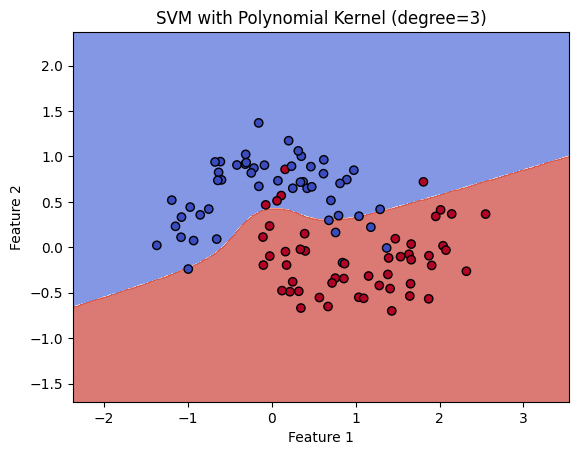

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

X, y = datasets.make_moons(n_samples=100, noise=0.2, random_state=42)

svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.7, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


 Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and
evaluate accuracy

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Gaussian Naïve Bayes Classifier:", accuracy)


Accuracy of Gaussian Naïve Bayes Classifier: 0.9736842105263158


 Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20
Newsgroups dataset.

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

data = fetch_20newsgroups(subset='all')
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_counts, y_train)

y_pred = mnb.predict(X_test_counts)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Multinomial Naïve Bayes Classifier:", accuracy)


Accuracy of Multinomial Naïve Bayes Classifier: 0.8745358090185676


Write a Python program to train an SVM Classifier with different C values and compare the decision
boundaries visually

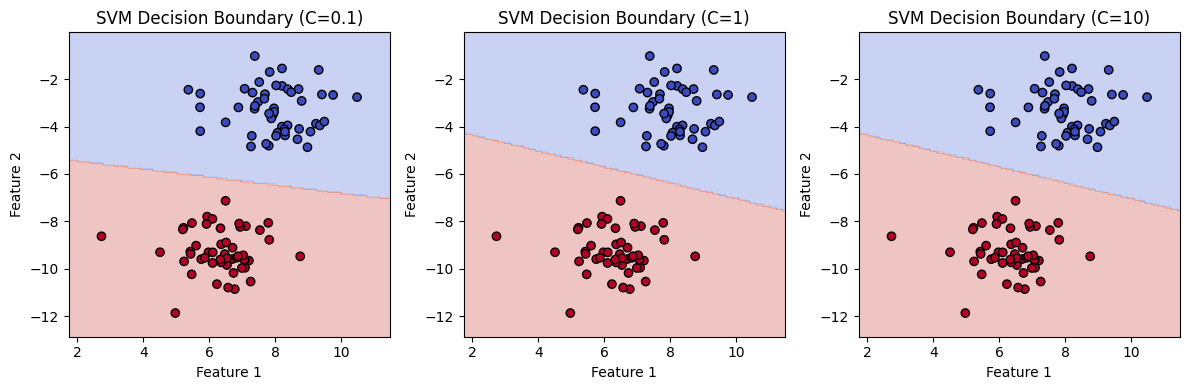

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

C_values = [0.1, 1, 10]
plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    plt.subplot(1, 3, i + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"SVM Decision Boundary (C={C})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with
binary features

In [4]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
X = np.random.randint(2, size=(100, 10))
y = np.random.randint(2, size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Bernoulli Naïve Bayes Classifier:", accuracy)


Accuracy of Bernoulli Naïve Bayes Classifier: 0.5


 Write a Python program to apply feature scaling before training an SVM model and compare results with
unscaled data

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = datasets.load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_unscaled = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without Feature Scaling:", acc_unscaled)
print("Accuracy with Feature Scaling:", acc_scaled)


Accuracy without Feature Scaling: 0.8055555555555556
Accuracy with Feature Scaling: 1.0


Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and
after Laplace Smoothing

In [7]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb_no_smoothing = GaussianNB(var_smoothing=1e-9)
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
acc_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

gnb_with_smoothing = GaussianNB(var_smoothing=1e-2)
gnb_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)
acc_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)

print("Accuracy without Laplace Smoothing:", acc_no_smoothing)
print("Accuracy with Laplace Smoothing:", acc_with_smoothing)



Accuracy without Laplace Smoothing: 1.0
Accuracy with Laplace Smoothing: 1.0


 Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,
gamma, kernel)

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy with Best Parameters:", accuracy)


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy with Best Parameters: 1.0


Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and
check it improve accuracy

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_unbalanced = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_unbalanced.fit(X_train, y_train)
y_pred_unbalanced = svm_unbalanced.predict(X_test)
acc_unbalanced = accuracy_score(y_test, y_pred_unbalanced)

svm_weighted = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
acc_weighted = accuracy_score(y_test, y_pred_weighted)

print("Accuracy without Class Weights:", acc_unbalanced)
print("Accuracy with Class Weights:", acc_weighted)
print("\nClassification Report with Class Weights:\n", classification_report(y_test, y_pred_weighted))


Accuracy without Class Weights: 0.945
Accuracy with Class Weights: 0.935

Classification Report with Class Weights:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       179
           1       0.64      0.86      0.73        21

    accuracy                           0.94       200
   macro avg       0.81      0.90      0.85       200
weighted avg       0.95      0.94      0.94       200



Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

emails = [
    "Win a free iPhone now", "Congratulations! You have won cash prize",
    "Meeting scheduled at 10 AM", "Project deadline is tomorrow",
    "Exclusive offer just for you", "Please find the attached report",
    "Claim your reward now", "Let's discuss the quarterly review"
]

labels = [1, 1, 0, 0, 1, 0, 1, 0]

X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.25, random_state=42)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_counts, y_train)

y_pred = nb.predict(X_test_counts)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naïve Bayes Spam Detector:", accuracy)

sample = ["You won a free vacation!"]
sample_counts = vectorizer.transform(sample)
print("Prediction for sample message:", nb.predict(sample_counts)[0])


Accuracy of Naïve Bayes Spam Detector: 1.0
Prediction for sample message: 1


 Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and
compare their accuracy


In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Accuracy of SVM Classifier:", acc_svm)
print("Accuracy of Naïve Bayes Classifier:", acc_nb)


Accuracy of SVM Classifier: 1.0
Accuracy of Naïve Bayes Classifier: 1.0


Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare
results

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

data = datasets.load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_full = GaussianNB()
nb_full.fit(X_train, y_train)
y_pred_full = nb_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

print("Accuracy without Feature Selection:", acc_full)
print("Accuracy with Feature Selection:", acc_selected)


Accuracy without Feature Selection: 1.0
Accuracy with Feature Selection: 0.9444444444444444


Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO)
strategies on the Wine dataset and compare their accuracy

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

data = datasets.load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ovr_model = OneVsRestClassifier(SVC(kernel='linear', C=1.0))
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

ovo_model = OneVsOneClassifier(SVC(kernel='linear', C=1.0))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

print("Accuracy using One-vs-Rest (OvR):", acc_ovr)
print("Accuracy using One-vs-One (OvO):", acc_ovo)


Accuracy using One-vs-Rest (OvR): 1.0
Accuracy using One-vs-One (OvO): 1.0


Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast
Cancer dataset and compare their accuracy


In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', C=1.0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

acc_linear = accuracy_score(y_test, y_pred_linear)
acc_poly = accuracy_score(y_test, y_pred_poly)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("Accuracy with Linear Kernel:", acc_linear)
print("Accuracy with Polynomial Kernel:", acc_poly)
print("Accuracy with RBF Kernel:", acc_rbf)


Accuracy with Linear Kernel: 0.956140350877193
Accuracy with Polynomial Kernel: 0.9473684210526315
Accuracy with RBF Kernel: 0.9473684210526315


Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the
average accuracy

In [15]:
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

data = datasets.load_iris()
X = data.data
y = data.target

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(svm_model, X, y, cv=skf, scoring='accuracy')

print("Accuracy for each fold:", scores)
print("Average Accuracy:", np.mean(scores))



Accuracy for each fold: [1.         0.96666667 0.93333333 1.         0.93333333]
Average Accuracy: 0.9666666666666668


Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare
performance


In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = datasets.load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_default = GaussianNB()
nb_default.fit(X_train, y_train)
y_pred_default = nb_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

priors = [0.2, 0.3, 0.5]
nb_custom = GaussianNB(priors=priors)
nb_custom.fit(X_train, y_train)
y_pred_custom = nb_custom.predict(X_test)
acc_custom = accuracy_score(y_test, y_pred_custom)

print("Accuracy with Default Priors:", acc_default)
print("Accuracy with Custom Priors:", acc_custom)


Accuracy with Default Priors: 1.0
Accuracy with Custom Priors: 0.9666666666666667


Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

data = datasets.load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_full = SVC(kernel='linear', C=1.0)
svm_full.fit(X_train, y_train)
y_pred_full = svm_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=5)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

svm_rfe = SVC(kernel='linear', C=1.0)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

print("Accuracy without RFE:", acc_full)
print("Accuracy with RFE:", acc_rfe)


Accuracy without RFE: 1.0
Accuracy with RFE: 0.9722222222222222


 Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and
F1-Score instead of accuracy

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load dataset (Iris for example)
data = datasets.load_iris()
X = data.data
y = data.target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate using Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))


Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Detailed Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss


In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities
y_prob = nb.predict_proba(X_test)

# Calculate Log Loss
loss = log_loss(y_test, y_prob)

print("Log Loss:", loss)


Log Loss: 0.2037342715214191


Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

Accuracy: 0.9824561403508771


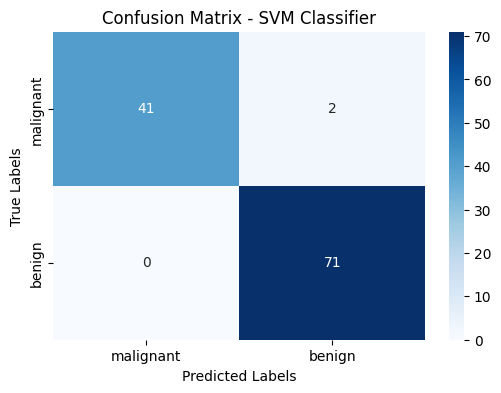

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()


Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute
Error (MAE) instead of MSE=


In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load dataset
data = datasets.load_diabetes()
X = data.data
y = data.target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict
y_pred = svr.predict(X_test)

# Evaluate using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 56.0294733040062


Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC
score=

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naïve Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities
y_prob = nb.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9983622666229938


Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

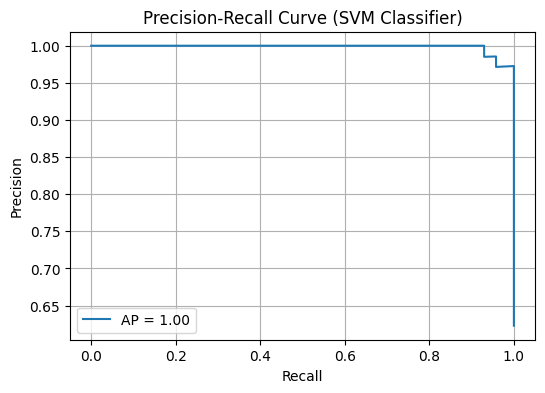

In [23]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM Classifier with probability=True to get scores
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict probabilities
y_scores = svm.predict_proba(X_test)[:, 1]

# Compute precision, recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM Classifier)')
plt.legend()
plt.grid(True)
plt.show()
